**MARKET BASKET ANALYSIS USING APRIORI ALGORITHM**

CODE CLAUSE_PROJECT_02

DONE BY MONICA R

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=cfb56d214190a7853f9c0fd4613119888f21e895898db85326bae226bde9ed77
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
df=pd.read_csv("/content/market_groceries_dataset.csv")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
transactions= df.groupby([ 'Member_number', 'Date' ])
transactions.count()


itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
...                                   ...
4999          24-01-2015                6
              26-12-2015                2
5000          09-03-2014                2
              10-02-2015                3
              16-11-2014                2

[14963 rows x 1 columns]

In [ ]:
support=(df['itemDescription'].value_counts()/14963*100)
support.head()


whole milk          16.721246
other vegetables    12.684622
rolls/buns          11.468288
soda                10.118292
yogurt               8.915324
Name: itemDescription, dtype: float64

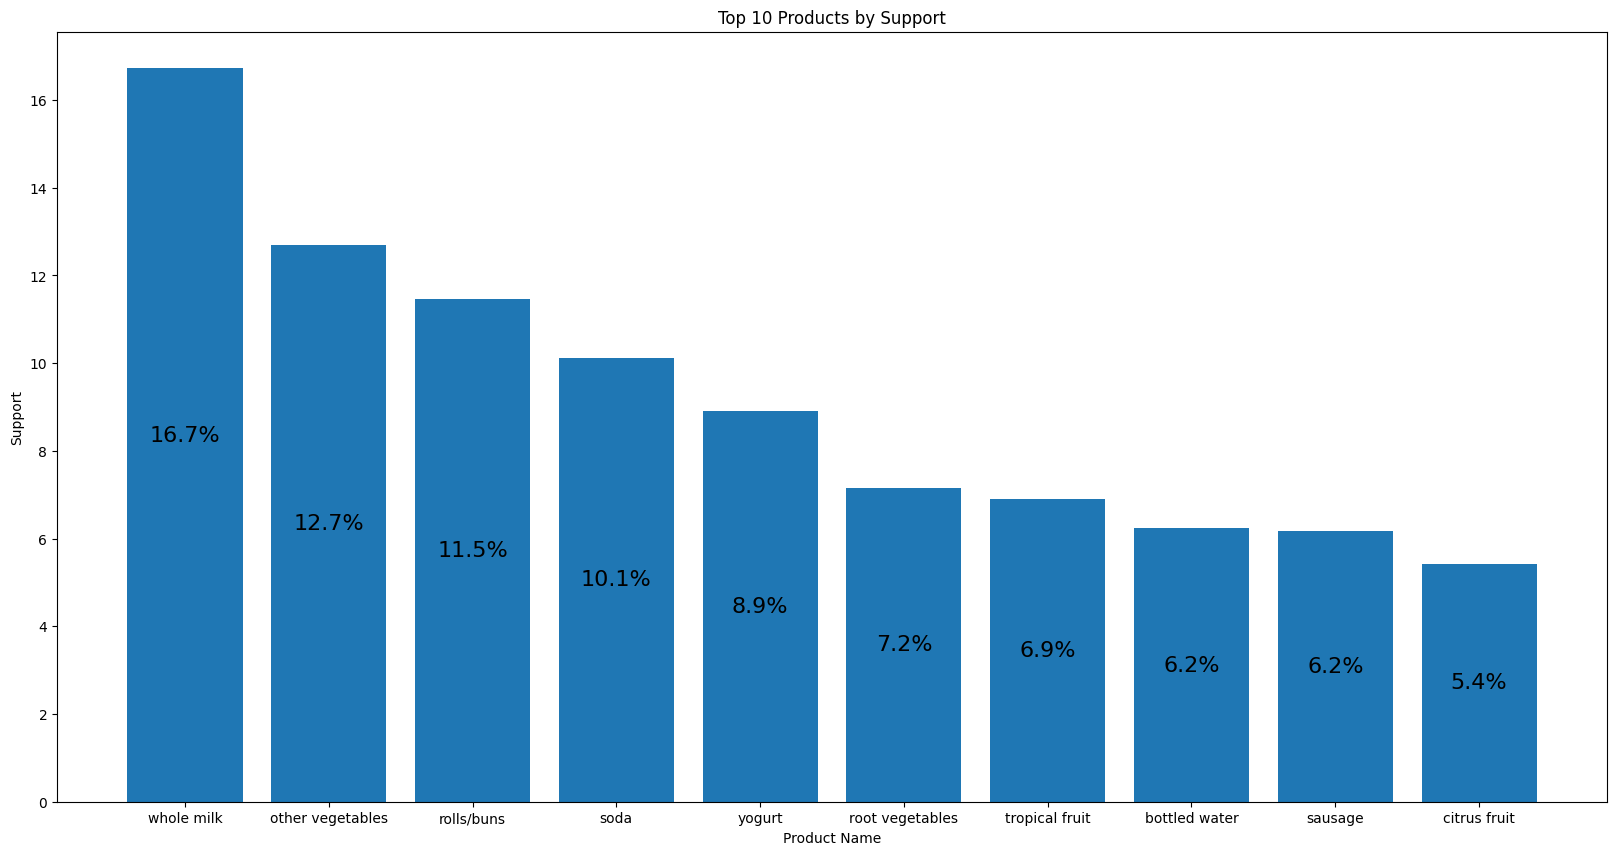

In [ ]:
plt.figure(figsize=(20,10))
bars=plt.bar(x=np.arange(len(support.head(10))),height=(support).head(10))
plt.bar_label(bars,fontsize=16,color='black',fmt='%2.1f%%',label_type='center')
plt.xticks(ticks = np.arange(len(support.head(10))), labels = support.index[:10])

plt.title('Top 10 Products by Support')
plt.ylabel('Support')
plt.xlabel('Product Name')
plt.show()

**Implementing Apriori Library**

In [ ]:
from apyori import apriori

In [ ]:
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transactions)]
list_transactions[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [ ]:
rules = apriori(list_transactions, min_support = 0.001, min_confidence = 0.05, min_lift = 1.2, max_length = 2)
results = list(rules)

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
final_df = pd.DataFrame(columns = ['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])
for i in results:
    if len(i[0]) > 1:
        for j in range(0, len(i[2])):
            LHS = list(i[2][j][0])[0]
            RHS = list(i[2][j][1])[0]
            SUPPORT = i[1]*100
            CONFIDENCE = i[2][j][2]*100
            LIFT = i[2][j][3]
            new_row = {'Left Hand Side': LHS, 'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
            final_df = final_df.append(new_row, ignore_index = True)
final_df['Rules'] = final_df['Left Hand Side'] + ' -> ' + final_df['Right Hand Side']
print('Number of Rules: ', final_df['Rules'].count(), 'Rules')
final_df.head()

Number of Rules:  30 Rules


<ipython-input-14-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-14-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-14-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-14-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-14-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,beverages,sausage,0.15,9.27,1.54,beverages -> sausage
1,bottled beer,sausage,0.33,7.37,1.22,bottled beer -> sausage
2,sausage,bottled beer,0.33,5.54,1.22,sausage -> bottled beer
3,sugar,bottled water,0.15,8.30,1.37,sugar -> bottled water
4,brown bread,canned beer,0.24,6.39,1.36,brown bread -> canned beer


Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

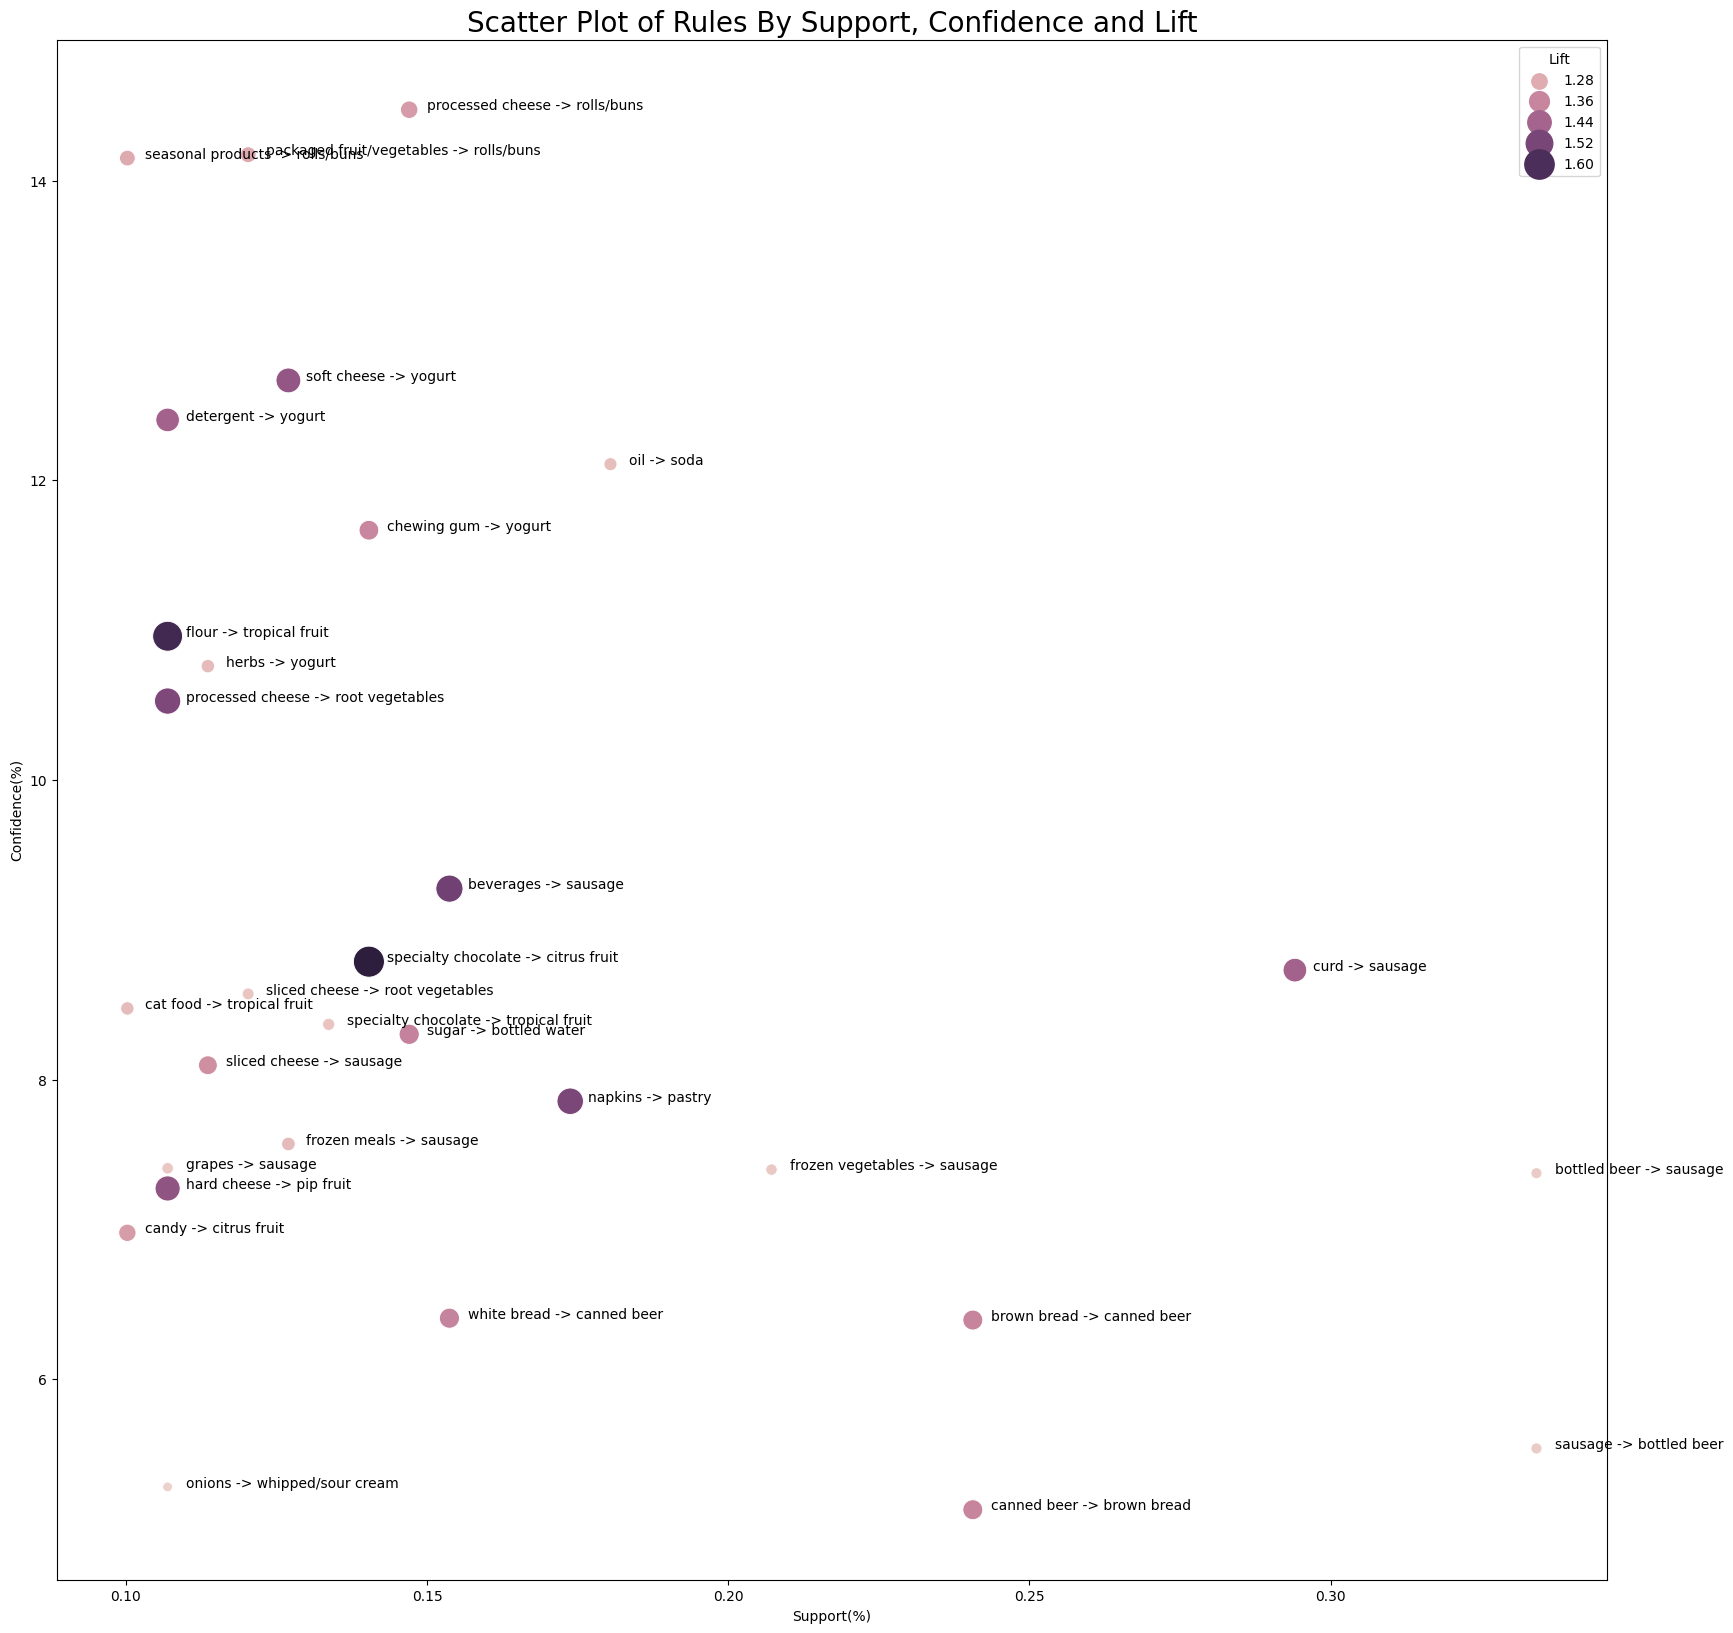

In [ ]:
# Plotting support, confidence and lift of rules
plt.figure(figsize = (20,20))
support = final_df['Support(%)']
confidence = final_df['Confidence(%)']
rule = final_df['Rules']
ax = sns.scatterplot(data = final_df, x = 'Support(%)', y = 'Confidence(%)', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.003, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)

In [ ]:
rules_2 = apriori(list_transactions, min_support = 0.001, min_confidence = 0.1, max_length = 3)
results_2 = list(rules_2)

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
final_df_2 = pd.DataFrame(columns = ['Left Hand Side 1', 'Left Hand Side 2','Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])
for i in results_2:
    if len(i[0]) > 2:
        for j in range(0, len(i[2])):
            LHS1 = list(i[2][j][0])[0]
            LHS2 = list(i[2][j][0])[1]
            RHS = list(i[2][j][1])[0]
            SUPPORT = i[1]*100
            CONFIDENCE = i[2][j][2]*100
            LIFT = i[2][j][3]
            new_row = {'Left Hand Side 1': LHS1, 'Left Hand Side 2': LHS2 ,'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
            final_df_2 = final_df_2.append(new_row, ignore_index = True)
final_df_2['Rules'] = final_df_2['Left Hand Side 1'] + ' + ' + final_df_2['Left Hand Side 2'] + ' -> ' + final_df_2['Right Hand Side']
print('Number of Rules: ', final_df_2['Rules'].count(), 'Rules')
final_df_2.head()

Number of Rules:  17 Rules


<ipython-input-17-eeeb97fc3efb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = final_df_2.append(new_row, ignore_index = True)
<ipython-input-17-eeeb97fc3efb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = final_df_2.append(new_row, ignore_index = True)
<ipython-input-17-eeeb97fc3efb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = final_df_2.append(new_row, ignore_index = True)
<ipython-input-17-eeeb97fc3efb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = final_df_2.append(new_row, ignore_index = True)
<ipython-input-17-eeeb97fc3efb>:13: FutureWarning: The frame.append meth

,Left Hand Side 1,Left Hand Side 2,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,other vegetables,rolls/buns,soda,0.11,10.76,1.11,other vegetables + rolls/buns -> soda
1,other vegetables,soda,rolls/buns,0.11,11.72,1.07,other vegetables + soda -> rolls/buns
2,rolls/buns,soda,other vegetables,0.11,14.05,1.15,rolls/buns + soda -> other vegetables
3,other vegetables,rolls/buns,whole milk,0.12,11.39,0.72,other vegetables + rolls/buns -> whole milk
4,other vegetables,soda,whole milk,0.11,11.72,0.74,other vegetables + soda -> whole milk


Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

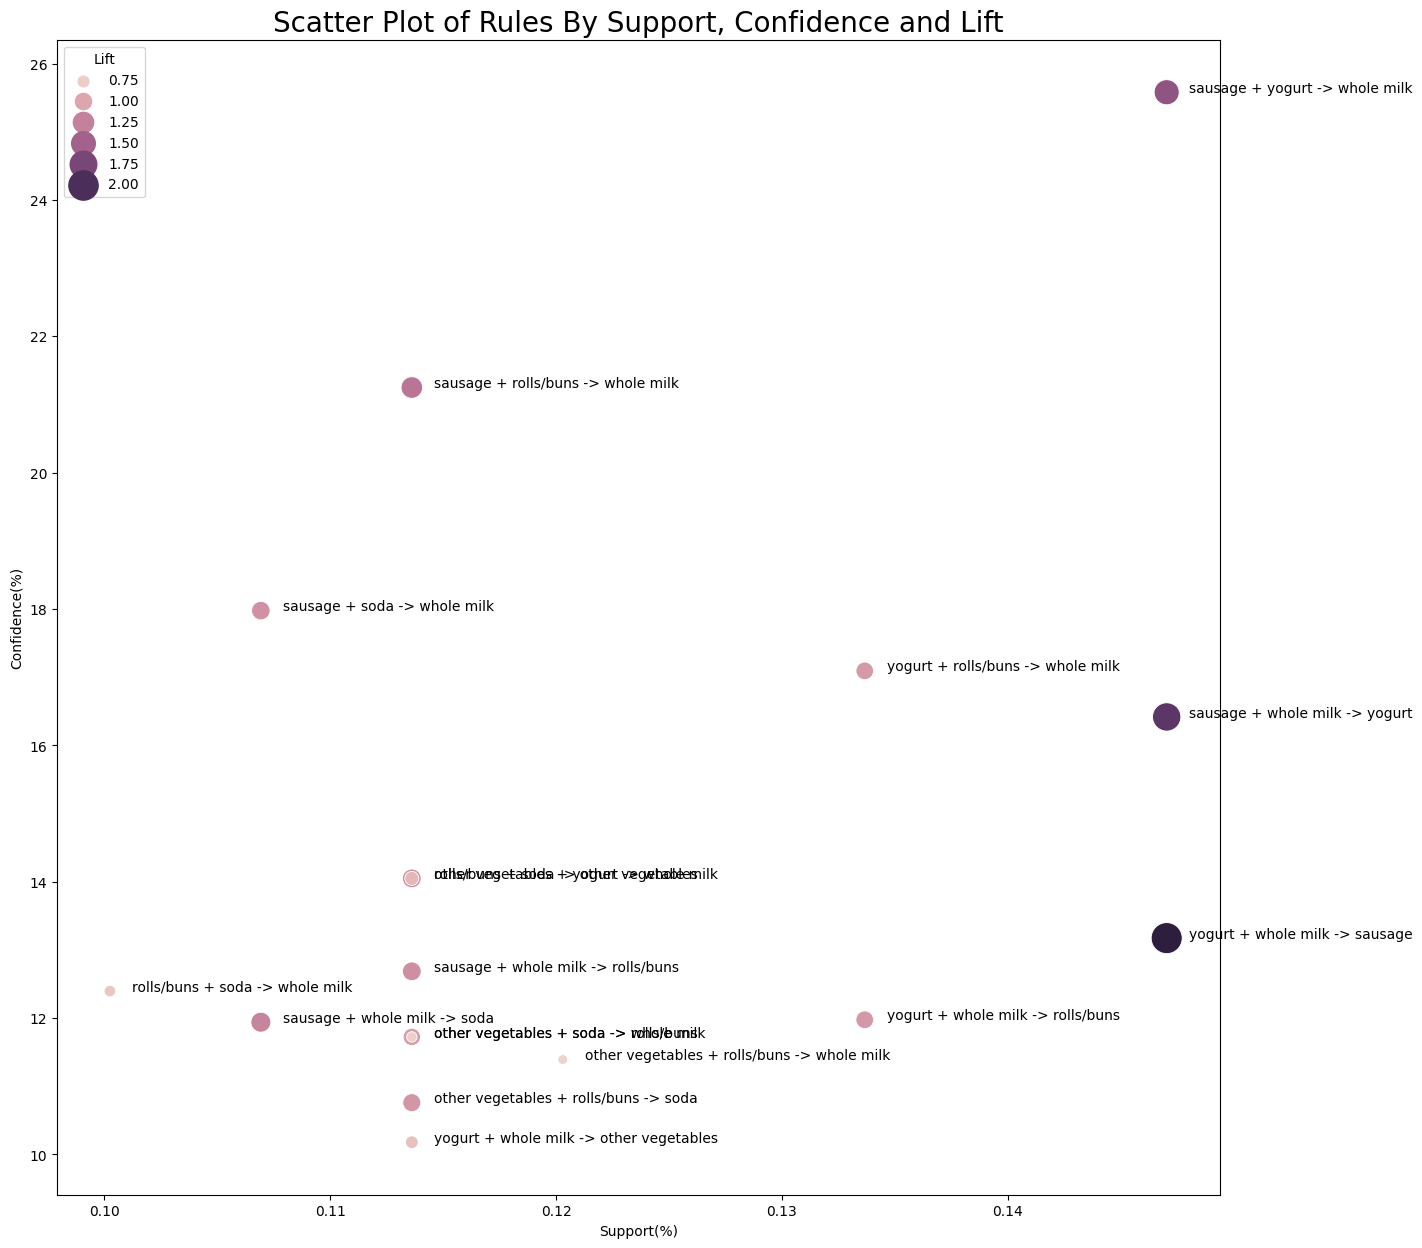

In [ ]:
# Plotting support, confidence and lift of new rules
plt.figure(figsize = (15,15))
support = final_df_2['Support(%)']
confidence = final_df_2['Confidence(%)']
rule = final_df_2['Rules']
ax = sns.scatterplot(data = final_df_2, x = 'Support(%)', y = 'Confidence(%)', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.001, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)